In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import glob
import ipyparallel as ipp
import momi
import os
import pandas as pd
import PTA

from IPython.display import display

pd.set_option('display.max_columns', None)

ipyclient = ipp.Client(cluster_id="ipyrad")
print(len(ipyclient))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
40


In [3]:
model = PTA.DemographicModel("expanding-counts")
model.set_param("project_dir", "./analysis/24samps_expanding_sims")
model.set_param("npops", 7)
model.set_param("nsamps", 24)
model.set_param("N_e", "1e4-1e6")
model.set_param("tau", "1e4-1e6")
model.set_param("epsilon", "2-20")
model.set_param("length", "150")
#computationally impractical to simulate 2e4 loci for 20 pops, but this is how you'd do it.
#model.set_param("num_replicates", [nloci_dict[x] for x in expanding_pops])
model.set_param("num_replicates", 500)
model.set_param("recoms_per_gen", 0)
model.set_param("muts_per_gen", 6.6e-9)
print(model.get_params())

model._hackersonly["sorted_sfs"] = False
model._hackersonly["proportional_msfs"] = False
model.simulate(nsims=40000, quiet=False, verbose=False, ipyclient=ipyclient)

------- PTA params file (v.0.0.11)----------------------------------------------
expanding-counts     ## [0] [simulation_name]: The name of this simulation scenario
/media/4TB/isaac/PTA-EasternSnakes/analysis/24samps_expanding_sims ## [1] [project_dir]: Where to save files
7                    ## [2] [npops]: Number of populations undergoing co-demographic processes
24                   ## [3] [nsamps]: Numbers of samples for each populations
10000-1000000        ## [4] [N_e]: Effective population size of the contemporary population
10000-1000000        ## [5] [tau]: Time of demographic change
2.0-20.0             ## [6] [epsilon]: Magnitude of demographic change
0                    ## [7] [zeta]: Proportion of coexpanding taxa. Default will sample U~(0, 1)
150                  ## [8] [length]: Length in bp of each independent genomic region to simulate
500,500,500,500,500,500,500 ## [9] [num_replicates]: Number of genomic regions to simulate
0.0                  ## [10] [recoms_per_g

In [4]:
sim_df = pd.read_csv("./analysis/24samps_expanding_sims/expanding-counts-SIMOUT.csv", sep=" ")
print(len(sim_df))
sfs_cols = [col for col in sim_df.columns if col.startswith("pop")]
params_cols = [col for col in sim_df.columns if col not in sfs_cols]
display(sim_df[sfs_cols].head())
display(sim_df[params_cols].head())

40000


,pop0-[[23__1]],pop0-[[22__2]],pop0-[[21__3]],pop0-[[20__4]],pop0-[[19__5]],pop0-[[18__6]],pop0-[[17__7]],pop0-[[16__8]],pop0-[[15__9]],pop0-[[14_10]],pop0-[[13_11]],pop0-[[12_12]],pop1-[[23__1]],pop1-[[22__2]],pop1-[[21__3]],pop1-[[20__4]],pop1-[[19__5]],pop1-[[18__6]],pop1-[[17__7]],pop1-[[16__8]],pop1-[[15__9]],pop1-[[14_10]],pop1-[[13_11]],pop1-[[12_12]],pop2-[[23__1]],pop2-[[22__2]],pop2-[[21__3]],pop2-[[20__4]],pop2-[[19__5]],pop2-[[18__6]],pop2-[[17__7]],pop2-[[16__8]],pop2-[[15__9]],pop2-[[14_10]],pop2-[[13_11]],pop2-[[12_12]],pop3-[[23__1]],pop3-[[22__2]],pop3-[[21__3]],pop3-[[20__4]],pop3-[[19__5]],pop3-[[18__6]],pop3-[[17__7]],pop3-[[16__8]],pop3-[[15__9]],pop3-[[14_10]],pop3-[[13_11]],pop3-[[12_12]],pop4-[[23__1]],pop4-[[22__2]],pop4-[[21__3]],pop4-[[20__4]],pop4-[[19__5]],pop4-[[18__6]],pop4-[[17__7]],pop4-[[16__8]],pop4-[[15__9]],pop4-[[14_10]],pop4-[[13_11]],pop4-[[12_12]],pop5-[[23__1]],pop5-[[22__2]],pop5-[[21__3]],pop5-[[20__4]],pop5-[[19__5]],pop5-[[18__6]],pop5-[[17__7]],pop5-[[16__8]],pop5-[[15__9]],pop5-[[14_10]],pop5-[[13_11]],pop5-[[12_12]],pop6-[[23__1]],pop6-[[22__2]],pop6-[[21__3]],pop6-[[20__4]],pop6-[[19__5]],pop6-[[18__6]],pop6-[[17__7]],pop6-[[16__8]],pop6-[[15__9]],pop6-[[14_10]],pop6-[[13_11]],pop6-[[12_12]]
0,2478,1922,1608,1447,1096,1288,1783,1727,1443,1112,1886,1107,2220,1813,1812,1700,2112,1711,2274,1640,1446,1653,1288,736,2932,1950,1687,2287,1768,1686,1872,947,1542,1727,1485,868,2413,1793,1875,1483,1693,1092,1334,1223,1718,1639,1305,1152,2710,2332,1513,1679,1388,1749,1713,1240,1313,1786,1315,938,1385,1090,834,820,796,825,1104,979,1012,576,906,576,2395,1658,1789,1729,1895,1738,1327,1660,1602,1317,1549,666
1,1998,1338,1089,1004,822,831,1154,815,871,772,748,359,1876,1637,1321,990,885,1031,1041,1099,753,953,938,486,2064,1373,1338,980,1015,1023,950,848,826,898,805,445,1861,1473,931,999,1011,932,879,811,934,1078,1083,334,2041,1361,1355,1124,888,704,933,828,731,928,923,443,2202,1283,1140,1039,1051,1141,1237,1010,1004,738,973,407,3353,2340,1831,1715,1392,1713,1404,1272,1334,1576,1402,653
2,6736,6593,7482,5116,6373,6199,5066,5050,5562,3795,5209,3810,8080,7297,7568,4363,6653,5422,4465,6413,4608,4560,5373,1815,1455,822,833,740,710,613,627,570,658,635,500,212,7881,7303,5877,6244,6453,5569,6058,6312,6396,4714,5316,2304,661,538,597,518,303,405,288,313,366,312,300,321,6819,4990,4758,4411,2607,3223,2740,3119,2482,1897,2802,1141,62,33,21,27,20,16,15,16,12,11,10,7
3,2106,1406,1337,1834,1302,1368,1133,1172,981,1288,865,611,1989,1534,1489,1486,1471,1031,1192,1254,1122,770,1418,507,4777,4097,3951,3718,3413,2817,3267,3057,3107,3104,2945,1189,991,604,598,436,443,338,354,373,290,423,422,96,9834,7224,6239,5344,4518,3643,3053,3095,3056,3451,3293,1111,635,433,477,405,350,337,400,351,403,352,312,221,12639,8571,6934,5094,3960,3545,3827,2658,3382,3318,2760,1262
4,1847,1259,1390,1612,1332,1512,1312,1334,1115,1311,1125,451,1906,1171,1314,1641,1272,824,1090,879,1167,1117,1808,687,1546,1434,1337,1458,1177,1013,1291,785,933,1165,1307,601,1605,1707,923,1206,935,1137,898,944,1146,1039,1522,442,782,493,403,404,345,357,305,359,299,401,229,149,2936,2338,2023,1697,1994,2234,1987,1548,1633,1816,1692,980,2710,2027,1642,1560,1580,1437,1054,1468,1388,1090,1382,731


,zeta,zeta_e,psi,t_s,omega,taus_mean,taus_std,taus_skewness,taus_kurtosis,taus_median,taus_iqr,epsilons_mean,epsilons_std,epsilons_skewness,epsilons_kurtosis,epsilons_median,epsilons_iqr,Ne_s_mean,Ne_s_std,Ne_s_skewness,Ne_s_kurtosis,Ne_s_median,Ne_s_iqr
0,0.741,5,1,880748,0.000,489149.667,283439.908,0.565,-1.500,367481.0,330764.00,13.059,2.241,0.642,-1.500,11.884,2.549,461659.857,213780.908,1.006,0.146,417871.0,173645.5
1,0.789,6,1,674261,0.013,667122.500,7138.500,0.000,-2.000,667122.5,7138.50,4.716,0.100,0.000,-2.000,4.716,0.100,374263.571,315180.265,0.381,-1.478,211976.0,525269.0
2,0.353,2,1,794799,0.000,528104.667,296869.179,-0.325,-1.530,606744.0,517510.75,14.271,4.197,-1.003,-0.293,15.929,3.850,535986.143,359535.932,0.035,-1.633,442496.0,647934.0
3,0.326,2,1,420918,0.000,400676.000,357168.736,0.433,-1.526,270019.5,616313.25,11.341,4.576,-0.217,-0.607,11.396,3.972,428947.143,256310.630,0.056,-1.008,422579.0,301855.5
4,0.597,4,1,726689,0.000,565212.500,224268.238,-0.086,-1.685,576893.5,364229.00,9.316,4.133,0.599,-1.230,8.071,5.667,461759.857,211717.260,-0.456,-1.340,517409.0,355083.0


In [5]:
from sklearn.ensemble import RandomForestRegressor
rgr_params = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 70,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
# This is super dumb
sim_df = pd.read_csv("./analysis/24samps_expanding_sims/expanding-counts-SIMOUT.csv", sep=" ")
synthetic_community = pd.DataFrame(sim_df.loc[0]).T.drop(PTA.inference.default_targets, axis=1)


40000
Removed invariant targets. Retained: ['zeta', 'zeta_e', 'psi', 't_s', 'omega', 'taus_mean', 'taus_std', 'taus_skewness', 'taus_kurtosis', 'taus_median', 'taus_iqr', 'epsilons_mean', 'epsilons_std', 'epsilons_skewness', 'epsilons_kurtosis', 'epsilons_median', 'epsilons_iqr', 'Ne_s_mean', 'Ne_s_std', 'Ne_s_skewness', 'Ne_s_kurtosis', 'Ne_s_median', 'Ne_s_iqr']
Predict() started: 2021-09-15 02:09:55.988293
Predict() finished: 2021-09-15 02:13:56.268645
                             MAE         RMSE    vscore        R2
zeta                    0.128698     0.000780  0.708624  0.708463
zeta_e                  0.897962     0.005473  0.719100  0.718940
psi                     0.251304     0.001625  0.377824  0.377720
t_s                174707.290092  1078.571632  0.429847  0.429770
omega                   0.004297     0.000614 -0.002171 -0.002171
taus_mean          103856.407618   658.611392  0.311584  0.311541
taus_std            64739.023943   403.413123  0.384059  0.384004
taus_skewnes

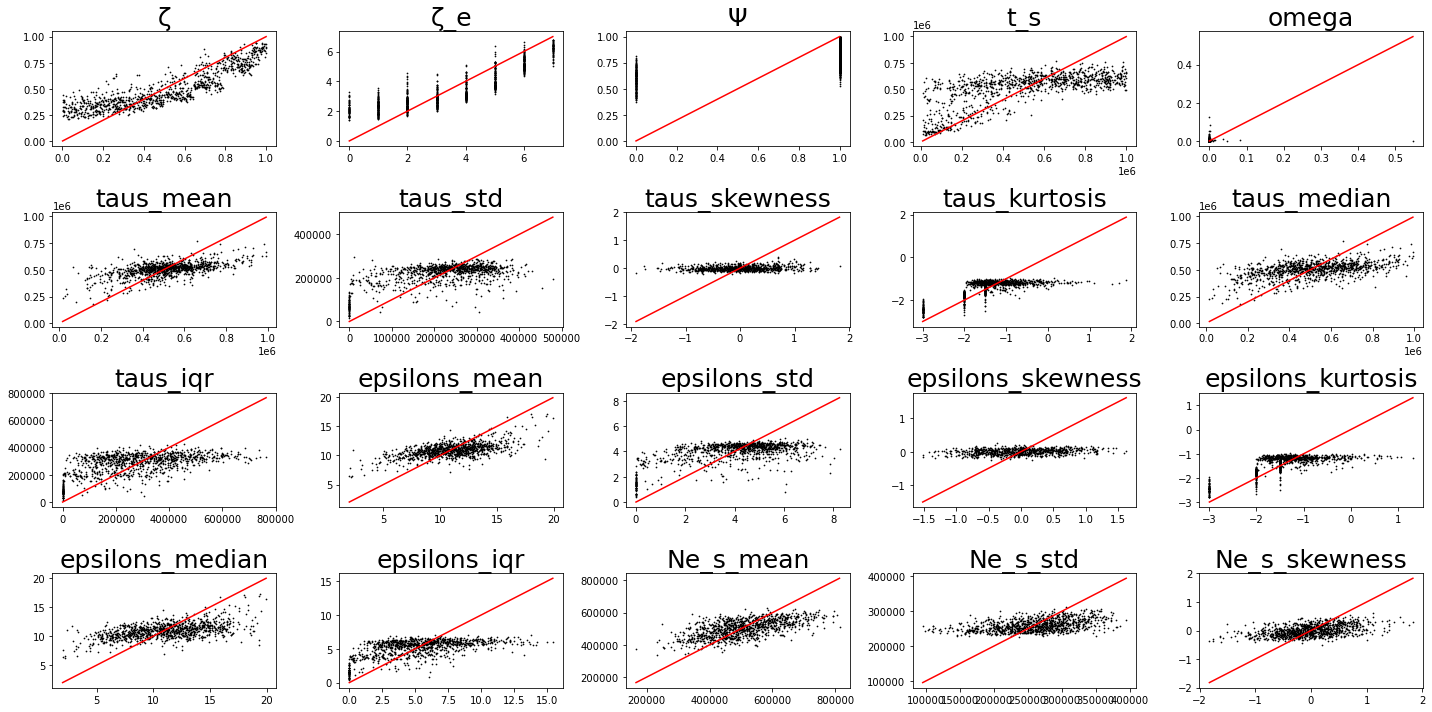

In [6]:
sim_df1 = pd.read_csv("./analysis/24samps_expanding_sims/expanding-counts-SIMOUT.csv", sep=" ")
print(len(sim_df))
rgr1 = PTA.inference.Regressor(empirical_df=synthetic_community,\
                                sims=sim_df1,\
                                algorithm="rf",\
                                verbose=True)
rgr1.set_params(rgr_params)
#rgr1.set_targets(["zeta", "t_s", "omega"])
rgr1.predict(select_features=False,\
            param_search=False,\
            quick=False,\
            verbose=True)
cv_preds1 = rgr1.cross_val_predict(verbose=True)
cv_scores1 = rgr1.cross_val_score(verbose=True)
ax = rgr1.plot_cv_predictions(figsize=(20,10), figdims=(4,5))

In [48]:
sim_df1[sim_df1["omega"]>0]

,zeta,zeta_e,psi,t_s,omega,taus_mean,taus_std,taus_skewness,taus_kurtosis,taus_median,taus_iqr,epsilons_mean,epsilons_std,epsilons_skewness,epsilons_kurtosis,epsilons_median,epsilons_iqr,Ne_s_mean,Ne_s_std,Ne_s_skewness,Ne_s_kurtosis,Ne_s_median,Ne_s_iqr,pop0-[[13__1]],pop0-[[12__2]],pop0-[[11__3]],pop0-[[10__4]],pop0-[[9_5]],pop0-[[8_6]],pop0-[[7_7]],pop1-[[13__1]],pop1-[[12__2]],pop1-[[11__3]],pop1-[[10__4]],pop1-[[9_5]],pop1-[[8_6]],pop1-[[7_7]],pop2-[[13__1]],pop2-[[12__2]],pop2-[[11__3]],pop2-[[10__4]],pop2-[[9_5]],pop2-[[8_6]],pop2-[[7_7]],pop3-[[13__1]],pop3-[[12__2]],pop3-[[11__3]],pop3-[[10__4]],pop3-[[9_5]],pop3-[[8_6]],pop3-[[7_7]],pop4-[[13__1]],pop4-[[12__2]],pop4-[[11__3]],pop4-[[10__4]],pop4-[[9_5]],pop4-[[8_6]],pop4-[[7_7]],pop5-[[13__1]],pop5-[[12__2]],pop5-[[11__3]],pop5-[[10__4]],pop5-[[9_5]],pop5-[[8_6]],pop5-[[7_7]],pop6-[[13__1]],pop6-[[12__2]],pop6-[[11__3]],pop6-[[10__4]],pop6-[[9_5]],pop6-[[8_6]],pop6-[[7_7]],pop7-[[13__1]],pop7-[[12__2]],pop7-[[11__3]],pop7-[[10__4]],pop7-[[9_5]],pop7-[[8_6]],pop7-[[7_7]]
30,0.933,7,1,73202,0.010,75982.500,2780.500,0.000,-2.0,75982.5,2780.5,3.697,0.682,0.000,-2.0,3.697,0.682,575281.250,261171.643,-0.113,-0.769,542020.0,319956.50,0.296,0.180,0.144,0.130,0.102,0.102,0.045,0.295,0.195,0.139,0.118,0.099,0.102,0.051,0.302,0.176,0.143,0.131,0.111,0.091,0.046,0.309,0.183,0.141,0.119,0.101,0.106,0.041,0.295,0.189,0.139,0.128,0.105,0.100,0.045,0.291,0.183,0.139,0.127,0.113,0.103,0.043,0.306,0.189,0.137,0.122,0.104,0.102,0.040,0.286,0.194,0.135,0.129,0.102,0.100,0.054
219,0.805,6,1,312642,0.001,344465.667,22608.281,-0.678,-1.5,357705.0,25204.0,13.679,3.919,-0.693,-1.5,16.128,4.305,631470.875,189158.626,0.237,-0.903,631354.5,193515.00,0.232,0.174,0.156,0.132,0.118,0.127,0.062,0.212,0.176,0.159,0.139,0.130,0.127,0.057,0.211,0.170,0.144,0.146,0.134,0.125,0.069,0.215,0.183,0.141,0.139,0.128,0.120,0.075,0.214,0.173,0.156,0.151,0.122,0.126,0.058,0.224,0.157,0.154,0.138,0.125,0.131,0.071,0.192,0.162,0.154,0.140,0.147,0.127,0.078,0.207,0.166,0.170,0.121,0.136,0.133,0.067
316,0.814,7,1,390986,0.004,381354.000,9632.000,0.000,-2.0,381354.0,9632.0,8.421,3.619,-0.000,-2.0,8.421,3.619,468673.250,220765.562,0.150,-0.584,419284.5,242761.25,0.199,0.177,0.148,0.150,0.137,0.131,0.057,0.202,0.164,0.150,0.133,0.145,0.140,0.066,0.186,0.171,0.148,0.150,0.132,0.138,0.075,0.208,0.171,0.137,0.147,0.139,0.119,0.080,0.212,0.142,0.138,0.148,0.132,0.145,0.083,0.200,0.166,0.160,0.137,0.140,0.125,0.071,0.216,0.154,0.150,0.143,0.126,0.144,0.067,0.279,0.213,0.145,0.123,0.120,0.087,0.032
400,0.818,7,1,281420,0.009,275974.500,5445.500,0.000,-2.0,275974.5,5445.5,10.382,0.260,0.000,-2.0,10.382,0.260,488806.375,326628.787,0.322,-1.309,395865.5,517709.50,0.234,0.189,0.158,0.143,0.120,0.112,0.045,0.238,0.191,0.147,0.134,0.115,0.114,0.061,0.233,0.190,0.147,0.138,0.120,0.119,0.053,0.233,0.180,0.152,0.131,0.126,0.112,0.065,0.239,0.191,0.148,0.128,0.125,0.110,0.058,0.240,0.182,0.157,0.130,0.117,0.112,0.063,0.239,0.180,0.157,0.134,0.124,0.110,0.056,0.198,0.172,0.159,0.141,0.135,0.131,0.062
402,0.877,7,1,64714,4.269,64591.000,123.000,0.000,-2.0,64591.0,123.0,11.426,6.096,0.000,-2.0,11.426,6.096,387691.500,340753.384,0.483,-1.361,274740.0,593665.00,0.183,0.170,0.180,0.134,0.138,0.126,0.069,0.177,0.162,0.159,0.147,0.124,0.159,0.072,0.201,0.172,0.157,0.159,0.123,0.117,0.072,0.181,0.152,0.156,0.135,0.151,0.155,0.069,0.173,0.161,0.164,0.151,0.137,0.145,0.068,0.197,0.159,0.160,0.138,0.153,0.127,0.066,0.171,0.186,0.147,0.162,0.124,0.141,0.069,0.221,0.162,0.137,0.139,0.170,0.112,0.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11724,0.904,7,1,548603,0.003,561623.000,13020.000,0.000,-2.0,561623.0,13020.0,7.337,3.140,0.000,-2.0,7.337,3.140,670031.375,312729.173,

## Sorted summary statistics

In [12]:
model = PTA.DemographicModel("expanding-sorted-counts")
model.set_param("project_dir", "./analysis/24samps_expanding_sims")
model.set_param("npops", 7)
model.set_param("nsamps", 24)
model.set_param("N_e", "1e4-1e6")
model.set_param("tau", "1e4-1e6")
model.set_param("epsilon", "2-20")
model.set_param("length", "150")
#computationally impractical to simulate 2e4 loci for 20 pops, but this is how you'd do it.
#model.set_param("num_replicates", [nloci_dict[x] for x in expanding_pops])
model.set_param("num_replicates", 500)
model.set_param("recoms_per_gen", 0)
model.set_param("muts_per_gen", 6.6e-9)
print(model.get_params())

model._hackersonly["sorted_sfs"] = True
model._hackersonly["proportional_msfs"] = False
model.simulate(nsims=4000, quiet=False, verbose=False, ipyclient=ipyclient)

------- PTA params file (v.0.0.11)----------------------------------------------
expanding-sorted-counts ## [0] [simulation_name]: The name of this simulation scenario
/media/4TB/isaac/PTA-EasternSnakes/analysis/24samps_expanding_sims ## [1] [project_dir]: Where to save files
7                    ## [2] [npops]: Number of populations undergoing co-demographic processes
24                   ## [3] [nsamps]: Numbers of samples for each populations
10000-1000000        ## [4] [N_e]: Effective population size of the contemporary population
10000-1000000        ## [5] [tau]: Time of demographic change
2.0-20.0             ## [6] [epsilon]: Magnitude of demographic change
0                    ## [7] [zeta]: Proportion of coexpanding taxa. Default will sample U~(0, 1)
150                  ## [8] [length]: Length in bp of each independent genomic region to simulate
500,500,500,500,500,500,500 ## [9] [num_replicates]: Number of genomic regions to simulate
0.0                  ## [10] [recoms_pe

12000
Removed invariant targets. Retained: ['zeta', 'zeta_e', 'psi', 't_s', 'omega', 'taus_mean', 'taus_std', 'taus_skewness', 'taus_kurtosis', 'taus_median', 'taus_iqr', 'epsilons_mean', 'epsilons_std', 'epsilons_skewness', 'epsilons_kurtosis', 'epsilons_median', 'epsilons_iqr', 'Ne_s_mean', 'Ne_s_std', 'Ne_s_skewness', 'Ne_s_kurtosis', 'Ne_s_median', 'Ne_s_iqr']
Predict() started: 2021-09-15 07:58:43.063252
Predict() finished: 2021-09-15 07:59:45.872127
                             MAE         RMSE    vscore        R2
zeta                    0.115325     0.001302  0.756914  0.756913
zeta_e                  0.801183     0.009063  0.768062  0.768061
psi                     0.248994     0.003075  0.336199  0.336194
t_s                194344.447292  2161.853329  0.308547  0.308537
omega                   0.188531     0.071471 -0.007324 -0.007324
taus_mean           99964.928154  1165.804758  0.353816  0.353816
taus_std            62487.849250   719.469610  0.402279  0.402279
taus_skewnes

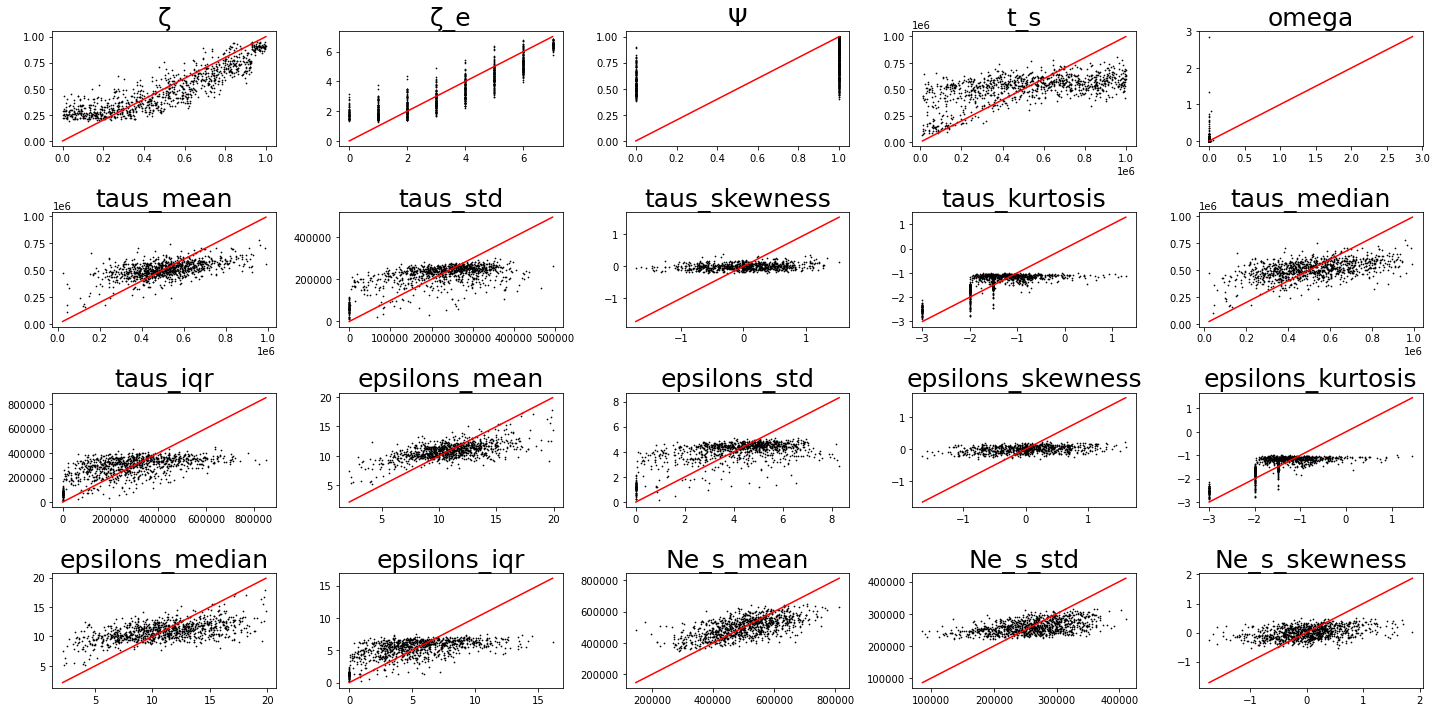

In [13]:
sim_df2 = pd.read_csv("./analysis/24samps_expanding_sims/expanding-sorted-counts-SIMOUT.csv", sep=" ")
print(len(sim_df2))
rgr1 = PTA.inference.Regressor(empirical_df=synthetic_community,\
                                sims=sim_df2,\
                                algorithm="rf",\
                                verbose=True)
rgr1.set_params(rgr_params)
#rgr1.set_targets(["zeta", "t_s", "omega"])
rgr1.predict(select_features=False,\
            param_search=False,\
            quick=False,\
            verbose=True)
cv_preds1 = rgr1.cross_val_predict(verbose=True)
cv_scores1 = rgr1.cross_val_score(verbose=True)
ax = rgr1.plot_cv_predictions(figsize=(20,10), figdims=(4,5))

## Trash below here

In [47]:
model.simulate(nsims=1, quiet=False, verbose=False)

    Generating 1 simulation(s).
  [                    ]   0%  Performing Simulations    | 0:00:00 | > /home/isaac/PTA/PTA/demography.py(577)serial_simulate()
    575                 ## pulses, then this will have to change
    576                 import pdb; pdb.set_trace()
--> 577                 msfs.set_params(pd.Series([zeta, zeta_e, psi, taus[0], pops_per_tau, taus, epsilons, N_es],\
    578                                         index=["zeta", "zeta_e", "psi", "t_s", "pops_per_tau", "taus", "epsilons", "N_es"]))
    579                 msfs_list.append(msfs)

ipdb> n
> /home/isaac/PTA/PTA/demography.py(578)serial_simulate()
    576                 import pdb; pdb.set_trace()
    577                 msfs.set_params(pd.Series([zeta, zeta_e, psi, taus[0], pops_per_tau, taus, epsilons, N_es],\
--> 578                                         index=["zeta", "zeta_e", "psi", "t_s", "pops_per_tau", "taus", "epsilons", "N_es"]))
    579                 msfs_list.append(msfs)
    580 

i

In [41]:
import itertools
import numpy as np

def _sample_tau(ntaus=1, pops_per_tau=[6, 1, 1]):
    tau = (1000, 10000)
    if isinstance(tau, tuple):
        tau = (tau[0], tau[1]+1)
    else:
        tau = (tau, tau+1)
    taus = [[np.random.randint(tau[0], tau[1], 1)[0]] * x for x in pops_per_tau]
    return taus
ts = _sample_tau(pops_per_tau=[5,1,1,1])
ts = np.array(itertools.chain.from_iterable(ts))
ts

array(<itertools.chain object at 0x7fc9dee12940>, dtype=object)

[5, 5, 5, 5, 5]